In [2]:
from cgi import print_environ
from time import time
import pandas as pd
from sklearn import datasets
from Preprocessor import Preprocessor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from ResultStorage import ResultStorage
from tqdm import tqdm
import fasttext

from Vectorizing.CountVectorizer import getCountVectorizer
from Vectorizing.TF_IDF_Vectorizer import getWordLevelVectorizer, getNGramLevelVectorizer
from Embedding.WordEmbedding import createWordEmbedding
from Report import Report
from Report.CrossValidateNN import cross_validate_NN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, make_scorer, accuracy_score, precision_score, recall_score, f1_score

TEXT = "Text"
LABEL = "Label"
CV_splits = 5
sample = True
nb_sample = 5000

ModuleNotFoundError: No module named 'Preprocessor'

In [2]:
def filter_dataframe(df, cat):
	count = 0
	for ind, row in df.iterrows():
		if cat != str(row[LABEL]):
			count += 1
			row[LABEL] = 'Other'
	print(f'{cat} filtered {count} rows in training dataset')

def get_sampling_strategy(df_train, cat):
	sizes = df_train.groupby(LABEL).size()
	indexes = list(sizes.index)
	cat_size = sizes[indexes.index(cat)]
	other_cat_size = int(cat_size/(len(df_train[LABEL].unique())-2))+1
	sampling_stratgy = {}
	for c in df_train[LABEL].unique():
		if c == cat:
			sampling_stratgy[c] = cat_size
		elif c == 'General':
			sampling_stratgy[c] = 0
		else:
			sampling_stratgy[c] = min(other_cat_size, sizes[indexes.index(c)])
	print('Sampling strategy: ', sampling_stratgy)
	return sampling_stratgy

In [2]:
df_readme = pd.read_csv('../data/readme_semantic_web.csv', sep=';')
print(df_readme[TEXT][0])
Preprocessor(df_readme).run()
print(df_readme[TEXT][0])
df_readme.drop(df_readme['Text'] == '\0', inplace=True)
df_readme.to_csv('../data/readme_semantic_web_preprocessed.csv', sep=';', index=False)

gantts pytorch implementation gantts high fidelity speech synthesis adversarial imagesganttsjpg prepare dataset download dataset training wav file sample rate 24000hz edit configuration utilsaudiopy hoplength must remain unchanged process data python processpy wavdirwavs outputdata train tensorboard python trainpy inputdatatrain tensorboard logdir logdir inference python generatepy inputdatatest result find result sample directory attention use loss function mentioned paper modified loss function learn use linguistic feature use mel spectrogram model considered vocoder note official implementation detail necessarily correct order accelerate convergence modified network structure loss function reference parallel gantts high fidelity speech synthesis
gantts pytorch gantts high fidelity speech synthesis adversarial imagesganttsjpg prepare dataset download dataset wav sample rate 24000hz edit configuration utilsaudiopy hoplength must remain unchanged process data processpy wavdirwavs outpu

                             Repo  Text
Label                                  
Computer Vision              3639  3639
Natural Language Processing   866   866
Reinforcement Learning        452   452
Sequential                    221   221
Graphs                        152   152
Audio                         123   123
5453
['Computer Vision', 'Natural Language Processing', 'Reinforcement Learning', 'Sequential', 'Graphs', 'Audio']
[3639  866  452  221  152  123]


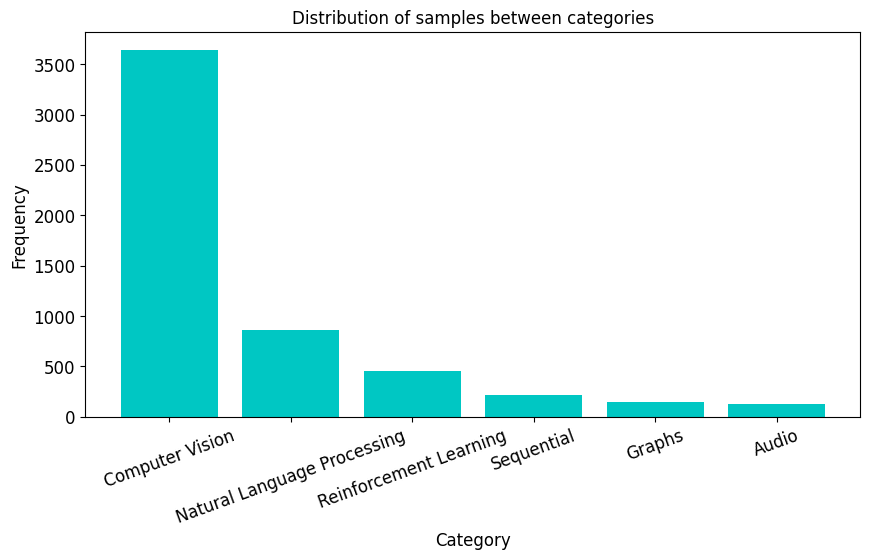

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../data/base_datasets/readme_new.csv', sep=';')
df = df.drop(df[df.Label == 'General'].index)

distribution = df.groupby('Label').count().sort_values('Repo', ascending=False)
print(distribution)

print(sum(list(distribution['Repo'])))
labels = list(distribution.index)
#labels.sort()
print(labels)
vals = distribution['Repo'].values
print(vals)

plt.figure(figsize=(10,5))
plt.bar(labels, vals, color='#00c7c3')
plt.title(f'Distribution of samples between categories', size=12)#, weight='bold')
plt.xlabel('Category', size=12)#, weight='bold')
plt.ylabel('Frequency', size=12)#, weight='bold')
plt.xticks(rotation=20, size=12)
plt.yticks(size=12)
#plt.legend(prop={'size': 12})
plt.savefig('../../results/pics/class_distribution_without_general.png')
plt.show()
plt.close()


In [4]:
df_readme.to_csv('../data/readme_preprocessed.csv', sep=';', index=False)

In [ ]:
#categories = ["Sequential", "Natural Language Processing", "Audio", "Computer Vision", "Graphs", "Reinforcement Learning", 'Semantic Web']
categories = ['Audio']

In [ ]:
datasets = [('readme_train.csv', 'readme_test.csv')]

In [ ]:
df_train = pd.read_csv('../data/'+datasets[0][0], sep=';')
df_test = pd.read_csv('../data/'+datasets[0][1], sep = ';')

print(f'df_train: {df_train.shape}')
print(f'df_test: {df_test.shape}')
df_train.drop_duplicates(subset=['Text'], inplace=True, keep=False)
df_test.drop_duplicates(subset=['Text'], inplace=True, keep=False)
print(f'df_train: {df_train.shape}')
print(f'df_test: {df_test.shape}')

df_train: (7703, 3)
df_test: (856, 3)
df_train: (3435, 3)
df_test: (741, 3)


In [ ]:
#Preprocessor(df_train).run()
#Preprocessor(df_test).run()
df_train.drop( df_train[ df_train[TEXT] == "" ].index , inplace=True)
df_test.drop( df_test[ df_test[TEXT] == "" ].index , inplace=True)

In [ ]:
df_train = df_train.drop(columns = 'Repo')
x_train = df_train[TEXT]
y_train = df_train[LABEL]
x_test = df_test[TEXT]
y_test = df_test[LABEL]

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=get_sampling_strategy(df_train, 'Audio'))
x_train, y_train = undersample.fit_resample(x_train.to_frame(TEXT), y_train)

Sampling strategy:  {'Computer Vision': 9, 'Natural Language Processing': 9, 'General': 0, 'Reinforcement Learning': 9, 'Audio': 44, 'Graphs': 9, 'Sequential': 9}


In [ ]:
y_train = y_train.to_frame(LABEL)
filter_dataframe(y_train, 'Audio')
y_test = y_test.to_frame(LABEL)
filter_dataframe(y_test, 'Audio')

Audio filtered 45 rows in training dataset
Audio filtered 729 rows in training dataset


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=1000)
tfidf_vect.fit(x_train[TEXT])
xtrain_tfidf = tfidf_vect.transform(x_train[TEXT])
xtest_tfidf = tfidf_vect.transform(x_test)

In [ ]:
features = tfidf_vect.get_feature_names()
print(len(features))
print(features)

1000
['0', '1', '10', '100', '1000', '11', '110m', '12', '128', '12heads', '12layer', '13', '14', '15', '16', '18', '19', '1blyrics', '2', '20', '2007', '2014', '2017', '20170118', '2018', '2019', '2020', '2021', '22050', '24', '24layer', '25', '256', '3', '30', '32', '36', '37', '3d', '4', '40', '5', '50', '512', '51m', '5b', '5blyrics', '6', '64', '7', '768hidden', '8', '9', '900k1190k', 'able', 'access', 'according', 'accuracy', 'achieve', 'achieves', 'action', 'activate', 'activation', 'active', 'adapted', 'add', 'added', 'adding', 'additional', 'ae', 'aev2a', 'agent', 'al', 'algorithm', 'algoritmo', 'align', 'aligncenter', 'alignment', 'allows', 'almost', 'along', 'already', 'also', 'although', 'always', 'amount', 'anaconda', 'analysis', 'annotation', 'another', 'answer', 'answering', 'apache', 'apex', 'api', 'app', 'application', 'apply', 'approach', 'aprendizado', 'architecture', 'argument', 'around', 'array', 'article', 'artificial', 'arxiv', 'attention', 'audio', 'author', 'au

In [ ]:
encoder = LabelEncoder()
trainy_count = encoder.fit_transform(y_train)
testy_count = encoder.transform(y_test)
print(trainy_count[0])
print(y_train.head(1))

trainy_tfidf = encoder.fit_transform(y_train)
testy_tfidf = encoder.transform(y_test)

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

0
   Label
0  Audio
{'Audio': 0, 'Other': 1}


/home/jenifer/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jenifer/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
res, model_audio = Report.report(LogisticRegression(max_iter=10000), 'readme_train', 'readme_test', xtrain_tfidf, trainy_tfidf, xtest_tfidf, testy_tfidf, 'Audio', name='LR_TFIDF_RandomUnder', cv=CV_splits, dict_scoring=Report.score_metrics, save=False)

In [ ]:
#text = 'dcgan implement dcgan scratch mnist dataset read dcgan refer origin implement script jyupter notebook faster effici result implement person comput high end gpu servic includ script cpu work edit get start packag tensorflow version 20 kera tensorflow backend import layer numpi mathemat comput pil imag manipul matplotlib plot imag tfutil util kera tensorflow break line 46 gener block origin dcgan input diment vector 128 simplif line 51 gener block 1 channel inform line 66 tensor reshap remov channel blackwhit imag pyplot line 90 batch size divid half one half exampl true half go gener line 109 110 respect gener train get output 1 imag find accuraci batch gener well accuraci discrimin reduc built author nikita kodkani student refer unsupervis represent learn deep convolut gener adversari network'
text = ' audio cat speech cat cat cat image image yolo yolo'
print(model_audio.predict(tfidf_vect.transform([text])))
print(model_audio.predict_proba(tfidf_vect.transform([text])))

[0]
[[0.58698519 0.41301481]]


In [ ]:
y_pred = model_audio.predict(xtest_tfidf)

In [ ]:
y_unique = [0, 1]
cm = confusion_matrix(testy_tfidf, y_pred, labels=y_unique)
cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
print(f"Accuracy: {accuracy_score(testy_tfidf, y_pred)}")
m = precision_recall_fscore_support(testy_tfidf, y_pred, average='weighted')
precision = m[0]
recall = m[1]
f1score = m[2]
print(f"Precision: {m[0]} \nRecall: {m[1]} \nF1-score: {m[2]}")

Accuracy: 0.9284750337381916
Precision: 0.985182208982861 
Recall: 0.9284750337381916 
F1-score: 0.9514972275694978
